# Setup

In [4]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

# Load data

Below we load data from Chapter 3 of [An Introduction to Statistical Learning](https://www.statlearning.com/) to better understand how to use linear regressions.

> The Advertising data set consists of the sales of that product in 200 different markets, along with advertising budgets for the product in each of those markets for three different media: TV, radio, and newspaper.

In [6]:
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In this dataset Sales is the dependent variable (Y), while TV, Radio and Newspaper are indepednent varialbes (X1, X2 and X3 respectively)

>  It is not possible for our client to directly increase sales of the product. On the other hand, they can control the advertising expenditure in each of the three media. Therefore, if we determine that there is an association between advertising and sales, then we can instruct our client to adjust advertising budgets, thereby indirectly increasing sales. In other words, our goal is to develop an accurate model that can be used to predict sales on the basis of the three media budgets.

While our goal as journalists is rarely to instruct clients, we are interested in explaining phenomena. How much of this phenomenon of sales can be explained by the tree predictor variables (X1, X2 and X3) using a linear model? 

Let's find out...once we grasp the basics, we can move on to journalistic applicaitons.

# Exploring the data

From the documentation
> Advertising data sales (in thousands of units) for a particular product and advertising budgets (in thousands of dollars) for TV, radio, and newspaper media

## Summary Stats

In [7]:
advertising.describe().round(1)

,TV,Radio,Newspaper,Sales
count,200.0,200.0,200.0,200.0
mean,147.0,23.3,30.6,14.0
std,85.9,14.8,21.8,5.2
min,0.7,0.0,0.3,1.6
25%,74.4,10.0,12.8,10.4
50%,149.8,22.9,25.8,12.9
75%,218.8,36.5,45.1,17.4
max,296.4,49.6,114.0,27.0


## Plotting the data

Make some plots below to understand this data better

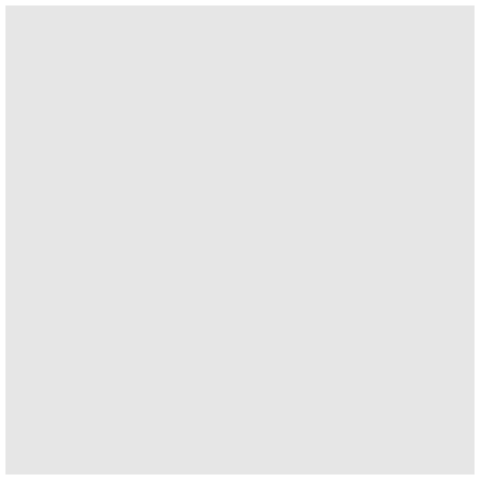

In [12]:
%%R -i advertising

require('tidyverse')

ggplot(advertising)


# Regression models

Run some regression models in the cells below to better understand this data

In [17]:
%%R

model <- lm(Sales ~ TV, data=advertising)
summary(model)


Call:
lm(formula = Sales ~ TV, data = advertising)

Residuals:
    Min      1Q  Median      3Q     Max 
-8.3860 -1.9545 -0.1913  2.0671  7.2124 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.032594   0.457843   15.36   <2e-16 ***
TV          0.047537   0.002691   17.67   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.259 on 198 degrees of freedom
Multiple R-squared:  0.6119,	Adjusted R-squared:  0.6099 
F-statistic: 312.1 on 1 and 198 DF,  p-value: < 2.2e-16



# What have we learned about the relationship between advertising and sales of this product? 👉 
(answer in the cell below)